<a href="https://colab.research.google.com/github/BAlshowaikh/ML-Projects/blob/main/Introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision

## What we will build?? :)
we'll build a neural network model ( an app in the future) that can distigush between different kins of food, we'll start with a small dataset (pizza and steak only) for simplicity.

## Get the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# After executing the previous code, we'll see the files in the file section in your left hand

--2024-02-06 04:39:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.207, 209.85.146.207, 209.85.147.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   195MB/s    in 0.5s    

2024-02-06 04:39:48 (195 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak #ls stands for list

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# Figure out the length of the directories and files in our dataset
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.'")

There are 2 directories and 0 images in 'pizza_steak.'
There are 2 directories and 0 images in 'pizza_steak/test.'
There are 0 directories and 250 images in 'pizza_steak/test/steak.'
There are 0 directories and 250 images in 'pizza_steak/test/pizza.'
There are 2 directories and 0 images in 'pizza_steak/train.'
There are 0 directories and 750 images in 'pizza_steak/train/steak.'
There are 0 directories and 750 images in 'pizza_steak/train/pizza.'


In [ ]:
# Another way to find how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class names from the subdirectory
print(class_names)

['pizza' 'steak']


In [ ]:
# Visulize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get random image
  random_image = random.sample(os.listdir(target_folder), 1) # 1 refers to one image

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img


Image shape: (384, 512, 3)


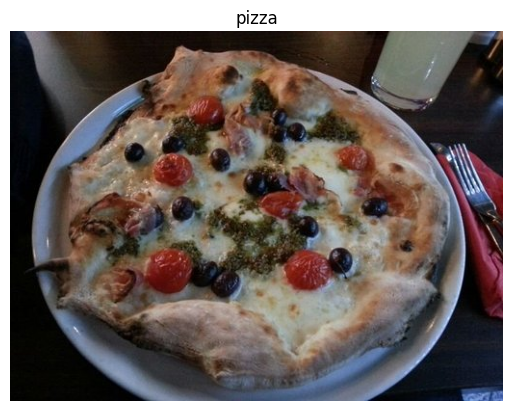

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir= "pizza_steak/train/",
                        target_class="pizza")


In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors odf different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 11,  13,  26],
        [ 11,  13,  26],
        [ 13,  16,  31],
        ...,
        [121,  95,  80],
        [145, 112,  95],
        [152, 117,  97]],

       [[ 10,  12,  25],
        [ 11,  13,  26],
        [ 12,  15,  30],
        ...,
        [128, 100,  86],
        [143, 110,  91],
        [149, 114,  94]],

       [[ 10,  12,  25],
        [ 11,  13,  26],
        [ 12,  15,  30],
        ...,
        [133, 105,  91],
        [144, 109,  90],
        [150, 114,  92]],

       ...,

       [[  5,   5,   3],
        [  4,   4,   2],
        [  3,   3,   1],
        ...,
        [ 81, 111, 183],
        [ 82, 112, 184],
        [ 74, 104, 176]],

       [[  3,   3,   1],
        [  4,   4,   2],
        [  4,   4,   2],
        ...,
        [ 96, 126, 196],
        [106, 136, 206],
        [ 97, 127, 197]],

       [[  2,   2,   0],
        [  4,   4,   2],
        [  5,   5,   3],
        ...,
        [ 81, 111, 18

In [ ]:
# Get all the pixel values between 0 and 1 (normalize)
img/255. #The reason we divide by 255 is because the pixel values in a digital image are typically represented as integers in the range of 0 to 255

array([[[0.04313725, 0.05098039, 0.10196078],
        [0.04313725, 0.05098039, 0.10196078],
        [0.05098039, 0.0627451 , 0.12156863],
        ...,
        [0.4745098 , 0.37254902, 0.31372549],
        [0.56862745, 0.43921569, 0.37254902],
        [0.59607843, 0.45882353, 0.38039216]],

       [[0.03921569, 0.04705882, 0.09803922],
        [0.04313725, 0.05098039, 0.10196078],
        [0.04705882, 0.05882353, 0.11764706],
        ...,
        [0.50196078, 0.39215686, 0.3372549 ],
        [0.56078431, 0.43137255, 0.35686275],
        [0.58431373, 0.44705882, 0.36862745]],

       [[0.03921569, 0.04705882, 0.09803922],
        [0.04313725, 0.05098039, 0.10196078],
        [0.04705882, 0.05882353, 0.11764706],
        ...,
        [0.52156863, 0.41176471, 0.35686275],
        [0.56470588, 0.42745098, 0.35294118],
        [0.58823529, 0.44705882, 0.36078431]],

       ...,

       [[0.01960784, 0.01960784, 0.01176471],
        [0.01568627, 0.01568627, 0.00784314],
        [0.01176471, 0

# Build a CNN model

> We need to:
* Load our images
* Preprocess our images
* Build a CNN find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set a random seed
tf.random.set_seed(42)

# Preprocess data (gat all if the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batchs
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # Same as above but without parameters names
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2), # Refers to the pool size
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # The output layer
])

# Compile the CNN
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 270ms/step - loss: 0.5899 - accuracy: 0.6893 - val_loss: 0.4567 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4569 - accuracy: 0.8060 - val_loss: 0.3857 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4412 - accuracy: 0.8053 - val_loss: 0.3798 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3933 - accuracy: 0.8313 - val_loss: 0.3788 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3173 - accuracy: 0.8727 - val_loss: 0.3876 - val_accuracy: 0.8320


# Build a non-CNN model

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 115ms/step - loss: 1.8783 - accuracy: 0.5220 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# See the summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Let's improve the non-CNN model
> we'll do that by increasing the number of hidden units

In [ ]:
# Set a random_seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
histroy_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 134ms/step - loss: 5.1688 - accuracy: 0.6440 - val_loss: 2.9935 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 1.4000 - accuracy: 0.7033 - val_loss: 0.5245 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.7674 - accuracy: 0.7287 - val_loss: 1.6281 - val_accuracy: 0.5760
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 1.2525 - accuracy: 0.6927 - val_loss: 0.6274 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.5218 - accuracy: 0.7893 - val_loss: 0.8059 - val_accuracy: 0.7020


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


##Observation based on the total params

> As the number of total params and trainable params indicates, it's about x20 (in model_2) and x50 (in model_3) than the CNN model, which means it learns the patterns of our image x20 or x50 than the CNN, althought that it's not performing well as the CNN model

🔑 Note: You can think of **trainable parameters** as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image

# Binary Classification: Break the CNN model down


1. Visualize the data
2. Preprocess the data (Prepare it for our model, normalizing/scaling & break it to batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters
7. Repeat unti satisfied

## 1.Load the data

Image shape: (364, 512, 3)
Image shape: (384, 512, 3)


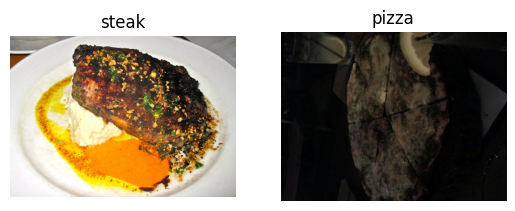

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2.Preprocess data

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

### Turn data into batches

A batch is a samll subset od data. Rather than look at all the data one time, a model might look at 32 at a time.

In [ ]:
# Create train and test data generatores and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224), #Target size of images (height, width)
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() #Get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3.Create a CNN model (Start with a baseline)

A baseline is a simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experminting you try to beat the baseline.

In [ ]:
# Make the creating if our model easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

### Create the model

In [ ]:
# Create the model (This will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # Number of sliding windows going across the input (higher=more complex model)
           kernel_size=3, # The size of sliding windows going across the input
           padding="valid", # If "same", output shape is same as input shape, if "valid" output shape gets compressed
           strides=1, # This size of steps the sliding window takes across the input
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"), # 10 refers to filter, and 3 refers to kernel size
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer (1 output nueron bc working with a binary classification)
])

###Compile the model

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

## 4.Fit the model

In [ ]:
# Check the length of training and test data generators
len(train_data), len(test_data) # The result will occurs in the form of batch
# training data = 1500 (47*32-size of each batch) & test data = 500 (16*32)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, #combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 137ms/step - loss: 1.5628 - accuracy: 0.5007 - val_loss: 0.6849 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6339 - accuracy: 0.6160 - val_loss: 0.5426 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.5193 - accuracy: 0.7640 - val_loss: 0.4792 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4437 - accuracy: 0.8100 - val_loss: 0.3876 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.4083 - accuracy: 0.8227 - val_loss: 0.4283 - val_accuracy: 0.8080


## 5.Evaluate the model

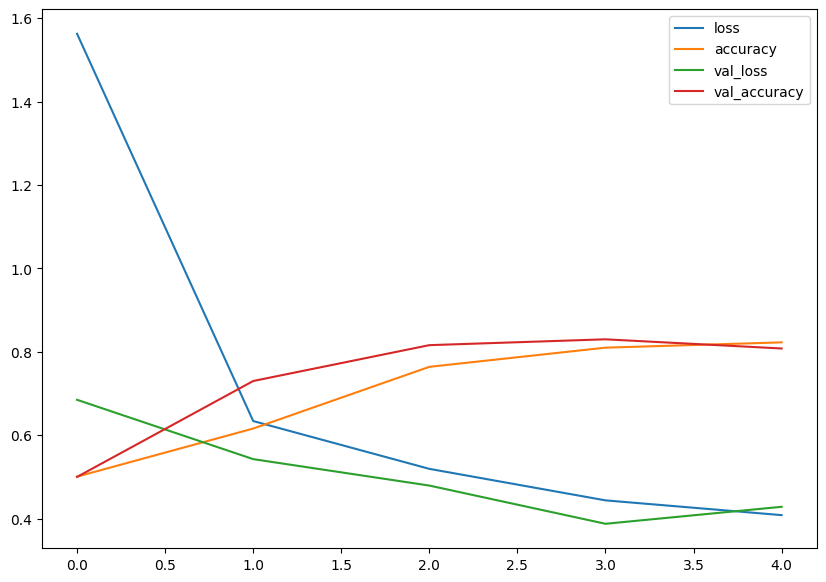

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));


In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss= history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs= range(len(history.history["loss"])) #How many epochs did we run for?

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legned();

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legned();

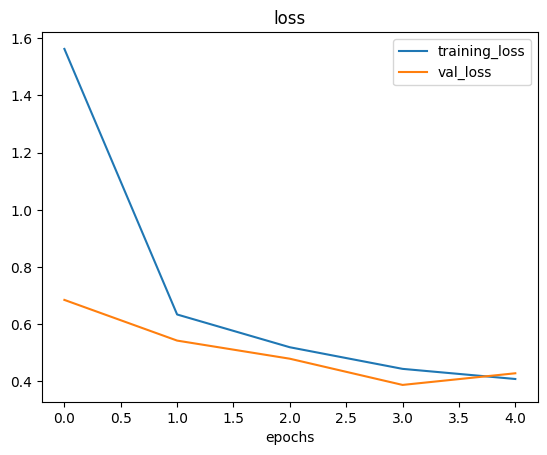

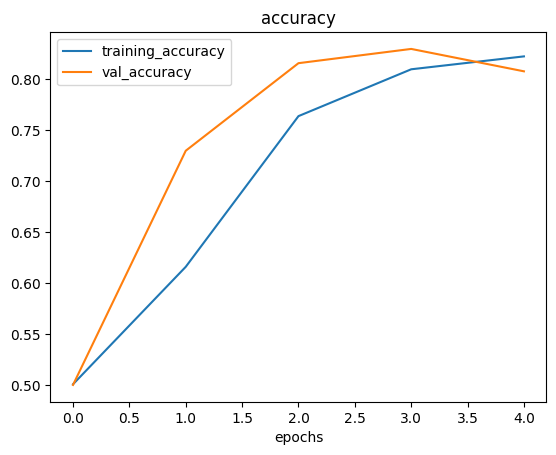

In [ ]:
#Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> **Note**: When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training set. Which means that it can't then generalize to the unseen data because it learned the training data too well.

## 6.Adjust the model

Fitting a machine learning model come in 3 steps:
1. Create a baseline
2. Beat the baseline by overfitting a laregr model
3. Reduce overfitting

Ways to induce overfitting:
1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of our flattened layer.


Reduce overfitting:
1. Add data augmentation
2. Add regularization layers (Ex. MaxPool)
3. Add more data


**Note**: Reducing overfitting is also known as **regularization**.

###Reduce overfitting by adding MaxPool layer


**Note**: MaxPool layer's function is to identify the most important features within our images (or data in general)

In [ ]:
# Create a model(new baseline)
model_5 = tf.keras.Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 124ms/step - loss: 0.6174 - accuracy: 0.6620 - val_loss: 0.4865 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4716 - accuracy: 0.7920 - val_loss: 0.4383 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4561 - accuracy: 0.7933 - val_loss: 0.3794 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4022 - accuracy: 0.8213 - val_loss: 0.3707 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3827 - accuracy: 0.8300 - val_loss: 0.3433 - val_accuracy: 0.8560


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

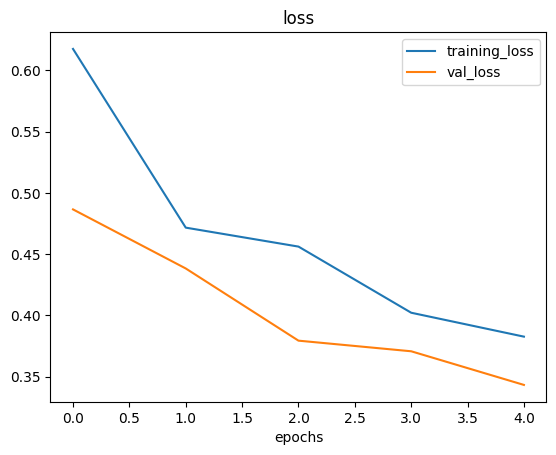

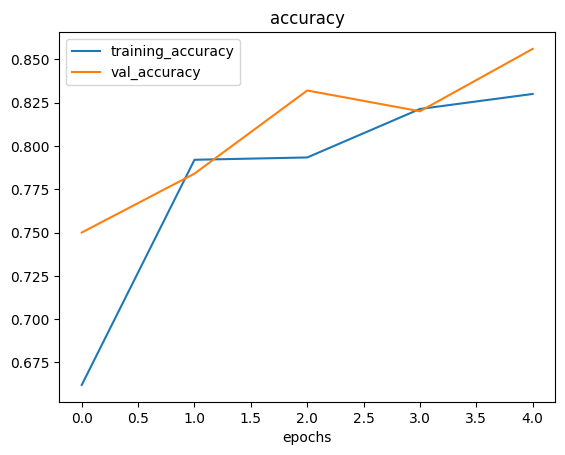

In [ ]:
plot_loss_curves(history_5)

### Reduce overfitting using data augemntation

**Note**: Data agmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable pattern. Altering might mean adjusting the rotation, flipping or cropping an image or something similar.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation on the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224, 224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False) # For demonstration pruposes only

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


**Note**: Data augmentation is usually performed only on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

####Visulize augmented data

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #Lables will not be augmented


Showing image number: 16


(-0.5, 223.5, 223.5, -0.5)

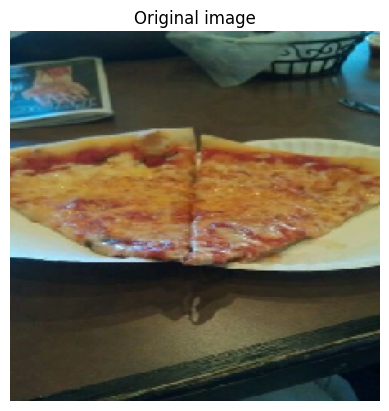

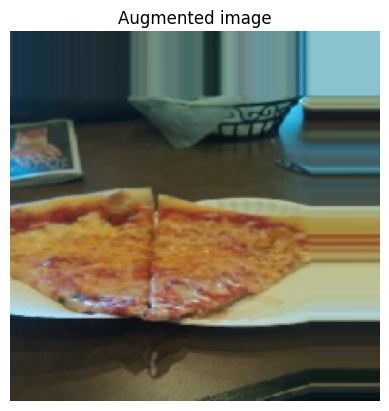

In [ ]:
# Show original and augmented image
import random
random_number = random.randint(0, 31) # Bc the batch size is 32
print(f"Showing image number: {random_number}")

# Plot original ranom image
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()

# Plot augmented image
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
# Create a model that uses the augmented data (same as model 5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

#Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 463ms/step - loss: 0.7075 - accuracy: 0.5540 - val_loss: 0.6863 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 21s 448ms/step - loss: 0.7053 - accuracy: 0.4693 - val_loss: 0.6714 - val_accuracy: 0.5500
Epoch 3/5
47/47 [==============================] - 23s 481ms/step - loss: 0.7096 - accuracy: 0.5787 - val_loss: 0.6455 - val_accuracy: 0.6160
Epoch 4/5
47/47 [==============================] - 24s 503ms/step - loss: 0.6901 - accuracy: 0.5600 - val_loss: 0.6824 - val_accuracy: 0.5120
Epoch 5/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6897 - accuracy: 0.5760 - val_loss: 0.6741 - val_accuracy: 0.5660


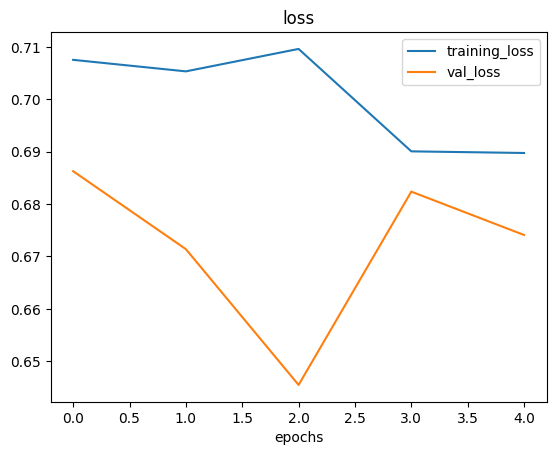

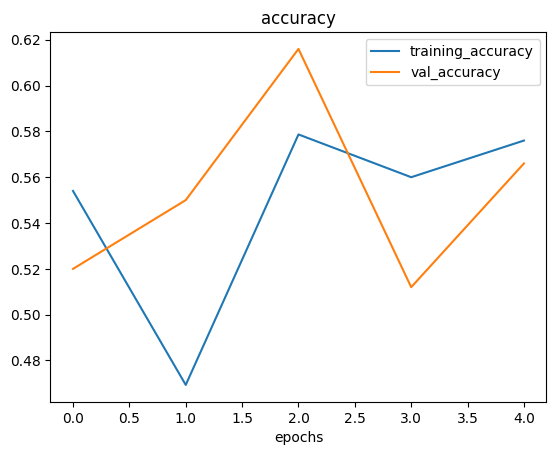

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Let's try to shuffle our augmented training data
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create another model (same as 5 and 6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 450ms/step - loss: 0.6963 - accuracy: 0.5127 - val_loss: 0.6747 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6285 - accuracy: 0.6553 - val_loss: 0.4625 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 22s 479ms/step - loss: 0.5483 - accuracy: 0.7287 - val_loss: 0.4378 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5214 - accuracy: 0.7433 - val_loss: 0.4079 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5303 - accuracy: 0.7453 - val_loss: 0.4387 - val_accuracy: 0.8000


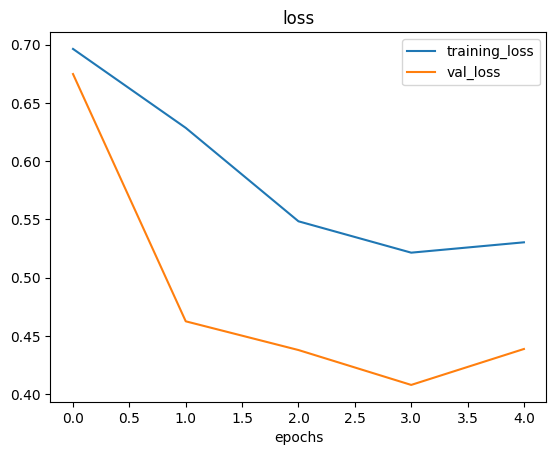

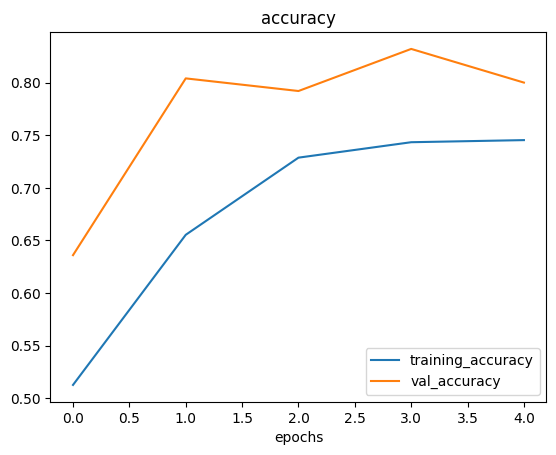

In [ ]:
plot_loss_curves(history_7)

> **Note**: When shuffling data, the model gest exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (pizza & steak at once, not pizza then steak)

## 7.Repeat until satisfied


There are few things we could try to improve our model:
* Increase the number of model layers (add more `Conv2D/ MaxPool2D`)
* Increase the number of filters in each CNN
* Train for longer
* Find the ideal learning rate
* Get more data
* Use **transfer learning**

In [ ]:
# # Same as model 7 but with increasing number of filters
# # model_8 = Sequential([
#     Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
#     MaxPool2D(pool_size=2),
#     Conv2D(32, 3, activation="relu"),
#     MaxPool2D(),
#     Conv2D(32, 3, activation="relu"),
#     MaxPool2D(),
#     Flatten(),
#     Dense(1, activation="sigmoid")
# ])

# # Compile the model
# model_8.compile(loss="binary_crossentropy",
#                 optimizer=Adam(),
#                 metrics="accuracy")

# # Fit the model
# history_8 = model_8.fit(train_data_augmented_shuffle,
#             epochs=5,
#             steps_per_epoch=len(train_data_augmented_shuffle),
#             validation_data=test_data,
#             validation_steps=len(test_data))

In [ ]:
# model_8.summary()

In [ ]:
# plot_loss_curves(history_8)

# Make a prediction

--2023-08-30 07:37:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-leaning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-08-30 07:37:30 ERROR 404: Not Found.



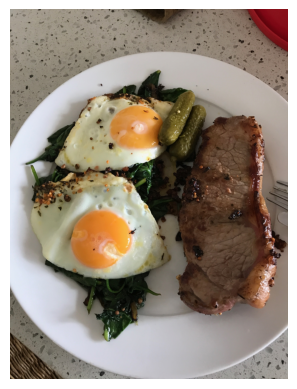

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-leaning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our images
steak.shape

(4032, 3024, 3)

In [ ]:
# Create a function to import and resized the image
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tesnor
  and reshape it to (img_shape, img_shape, color_channels)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Resacle the image (get all values between 0 and 1)
  img = img/255.

  return img

In [ ]:
# Load in and preprocess out image
steak = load_and_prep_image("03-steak.jpeg") # All values are scaled
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Predict using our last model (model_7)
model_7.predict(steak)

ValueError: ignored

**Note**: The above error becuase the code expects to see 4 dims, while it received 3 dims only, so we have to expand the dims using `tf.expand_dims`

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 158ms/step


array([[0.8975928]], dtype=float32)

**Note**: The output indicates a prediction probablities (How likly the image belongs to one class from another - in this case to pizza class or steak class -

### Create a function to plot the image and the predicted class name

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probabilites
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_name=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image alongside with the predicted class name.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predicted class is: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


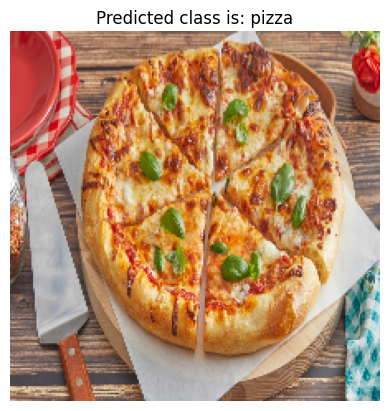

In [ ]:
# Try to predict in the custom image
pred_and_plot(model_7, "01-pizza.jpg")

1/1 [==============================] - 0s 31ms/step


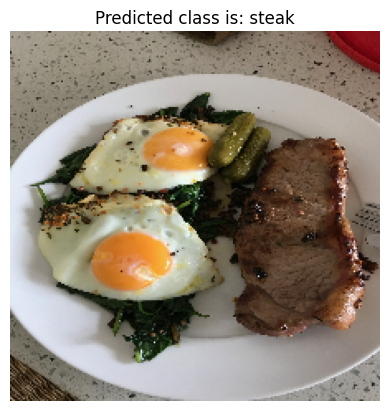

In [ ]:
# Try another image
pred_and_plot(model_7, "03-steak.jpeg")

# Multi-classs classification

We will go through
1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat unti satisfied

## 1.Load the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-30 07:38:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  53.7MB/s    in 11s     

2023-08-30 07:38:52 (43.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 10 directories and 0 images in 10_fo

In [ ]:
# Setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the subdirectories (our class names)
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (288, 512, 3)


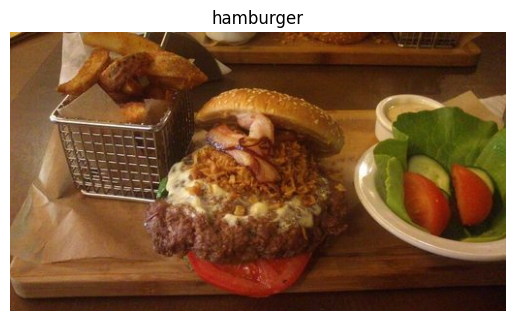

In [ ]:
# Visualize random image
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2.Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3.Create a CNN model


We will replicate the `CNN.explainer` website as it has 10 classes example

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dense, Flatten
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")


## 4.Fit the model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data, #Now differenet 10 classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 167ms/step - loss: 2.2127 - accuracy: 0.1824 - val_loss: 2.1022 - val_accuracy: 0.2112
Epoch 2/5
235/235 [==============================] - 55s 234ms/step - loss: 2.0570 - accuracy: 0.2484 - val_loss: 2.0013 - val_accuracy: 0.2884
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.8223 - accuracy: 0.3691 - val_loss: 1.8911 - val_accuracy: 0.3432
Epoch 4/5
235/235 [==============================] - 40s 171ms/step - loss: 1.4137 - accuracy: 0.5220 - val_loss: 2.1042 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 31s 132ms/step - loss: 0.8407 - accuracy: 0.7277 - val_loss: 2.5699 - val_accuracy: 0.3008


## 5.Evaluate the model

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 93ms/step - loss: 2.5699 - accuracy: 0.3008


[2.5698957443237305, 0.30079999566078186]

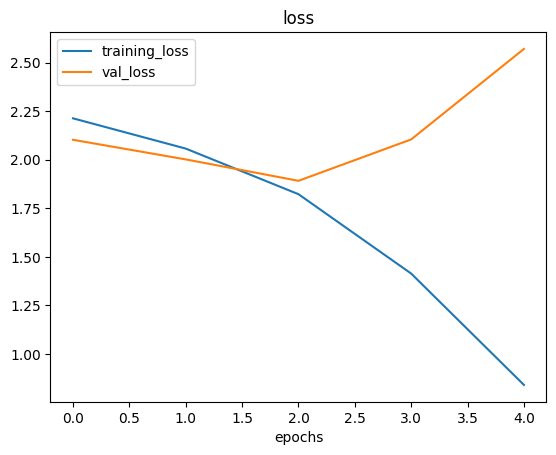

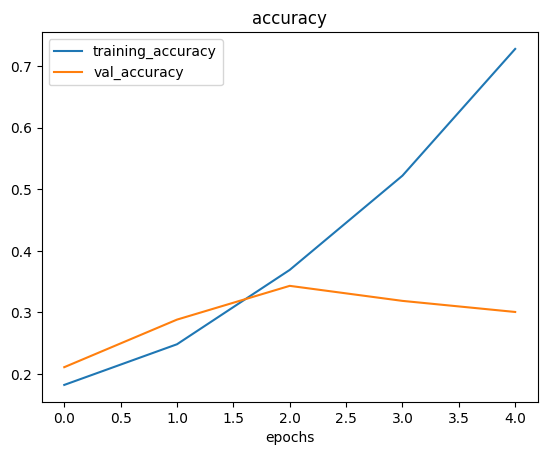

In [ ]:
# Check the model loss curves
plot_loss_curves(history_8)

**Note**: It seesms that our model is overfitting the training set, so it doesn't *generalize*

## 6.Adjust the parameters (Reduce overfitting)


Ways to reduce overfitting on dataset:
1. **Get more data**
2. **Simplify the model** - If the current model is overfitting it may be too complicated of a model, one way is to reduce hidden units in layers.
3. **Use data augmentation**: data augmentation manipulates the training data in such way to add more diversity without altering the original data.
3. **Use transfer learning**

In [ ]:
# Model_8 summary
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
# Simplify the model (Remove 2 convolutional layers)
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")


In [ ]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 131ms/step - loss: 2.0801 - accuracy: 0.2496 - val_loss: 1.9035 - val_accuracy: 0.3164
Epoch 2/5
235/235 [==============================] - 31s 133ms/step - loss: 1.7253 - accuracy: 0.4041 - val_loss: 1.8826 - val_accuracy: 0.3288
Epoch 3/5
235/235 [==============================] - 32s 138ms/step - loss: 1.2514 - accuracy: 0.5941 - val_loss: 1.9671 - val_accuracy: 0.3500
Epoch 4/5
235/235 [==============================] - 29s 123ms/step - loss: 0.7134 - accuracy: 0.7877 - val_loss: 2.2809 - val_accuracy: 0.3232
Epoch 5/5
235/235 [==============================] - 29s 122ms/step - loss: 0.3428 - accuracy: 0.9157 - val_loss: 2.8030 - val_accuracy: 0.3156


In [ ]:
# Model_9 summary
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_12 (Dense)            (None, 10)               

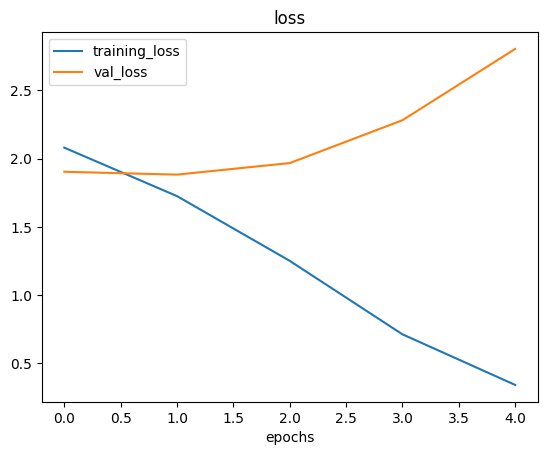

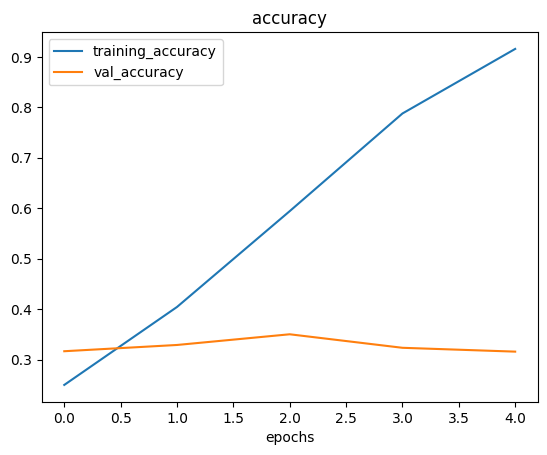

In [ ]:
# Check loss curves in model_9
plot_loss_curves(history_9)

### Fix overfitting by data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)


train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Create another model (with augmented data)
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 113s 470ms/step - loss: 2.1929 - accuracy: 0.1939 - val_loss: 1.9699 - val_accuracy: 0.3032
Epoch 2/5
235/235 [==============================] - 119s 507ms/step - loss: 2.0675 - accuracy: 0.2592 - val_loss: 1.9275 - val_accuracy: 0.3196
Epoch 3/5
235/235 [==============================] - 117s 496ms/step - loss: 2.0169 - accuracy: 0.2893 - val_loss: 1.9349 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 116s 495ms/step - loss: 1.9798 - accuracy: 0.3136 - val_loss: 1.9562 - val_accuracy: 0.3160
Epoch 5/5
235/235 [==============================] - 159s 677ms/step - loss: 1.9501 - accuracy: 0.3239 - val_loss: 1.8226 - val_accuracy: 0.3648


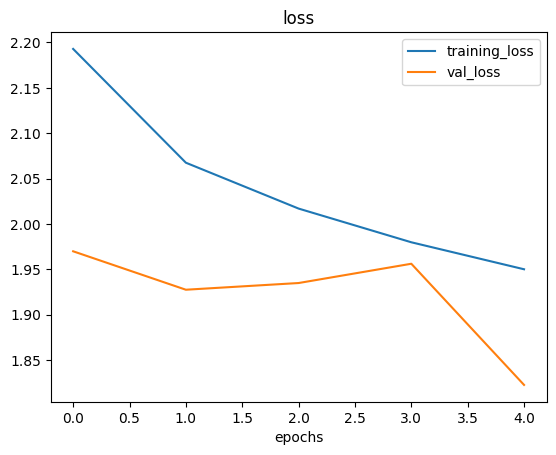

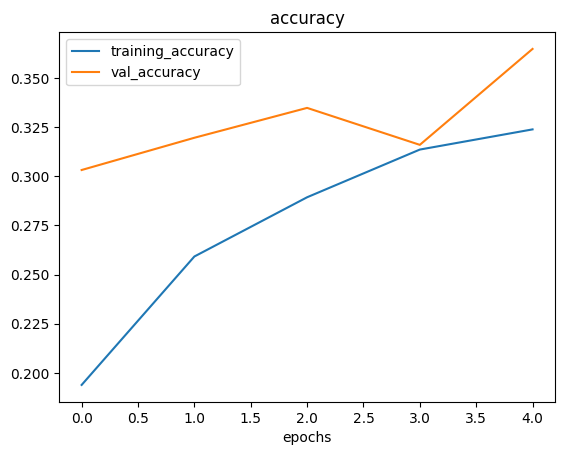

In [ ]:
# Plot loss curves of model_10
plot_loss_curves(history_10)

## 7.Repeat until satisfied

In [ ]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
# Create another model (as model_10) but with more filters

model_11 = Sequential([
    Conv2D(32, 3, input_shape=(224, 224, 3), activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 126s 514ms/step - loss: 2.3436 - accuracy: 0.1057 - val_loss: 2.3020 - val_accuracy: 0.1032
Epoch 2/5
235/235 [==============================] - 117s 497ms/step - loss: 2.3026 - accuracy: 0.1068 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 127s 537ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 118s 502ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 127s 540ms/step - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000


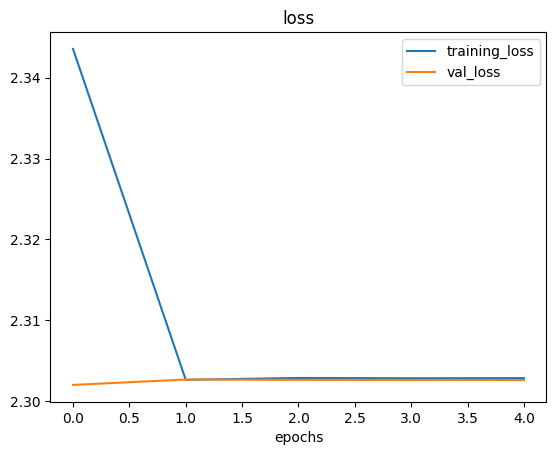

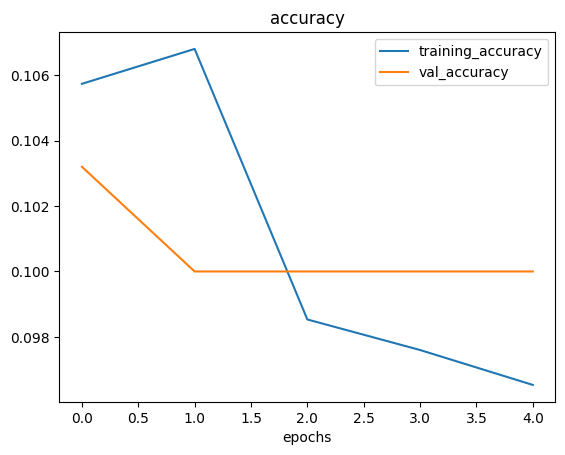

In [ ]:
plot_loss_curves(history_11)

## Making predictions

In [ ]:
# Remind ourselves of class names
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Reconfig our model pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_name=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image alongside with the predicted class name.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1: # If multi-class problem
    pred_class = class_names[tf.argmax(pred[0])]
  else: # Binary problem
    pred_class = class_names[int(tf.round[pred])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predicted class is: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 38ms/step


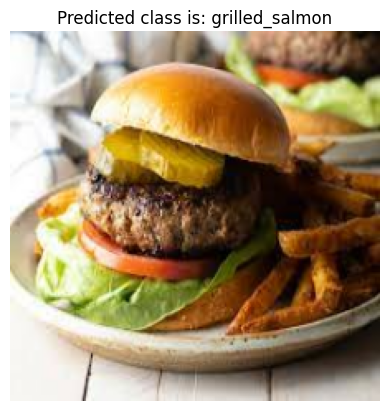

In [ ]:
pred_and_plot(model_10, "01-hamburger.jpeg")

# Save and load our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 1.8226 - accuracy: 0.3648


[1.8226308822631836, 0.36480000615119934]

In [ ]:
# Compare our loaded model and the existing model
model_10.evaluate(test_data) # It should be the same results

79/79 [==============================] - 7s 89ms/step - loss: 1.8226 - accuracy: 0.3648


[1.8226308822631836, 0.36480000615119934]